In [2]:
#inclination
#visualizing protostellar disks from 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
from astropy import units as u
from astropy.coordinates import SkyCoord
import astropy.coordinates as apycoords
from astroNN.gaia import gaiadr2_parallax
from mw_plot import MWPlot

import importlib
from functions import sort_functions_Inclination
importlib.reload(sort_functions_Inclination)

circumstellar_disks = pd.read_csv("data/circumstellardisks.csv")
data = pd.DataFrame(circumstellar_disks)
print(data )

                     Object Category Spec_Type R_band_mag  Distance_pc  \
0    2MASSI J1628137-243139       TT       NaN       17.7       140.00   
1                    49 Cet   Debris        A1        5.6        59.00   
2                    61 Vir   Debris       G7V        4.2         8.50   
3                    99 Her   Debris     F7+K4        4.7        15.60   
4      [MR81] H alpha 17 NE       TT       M2e       16.9       150.00   
5                    AA Tau       TT        M0       11.8       140.00   
6                    AB Aur      HAe       A0e        7.1       144.00   
7                 alpha CrB   Debris      A0 V        2.2        23.00   
8                  AS 205 A       TT        K0       12.8       128.00   
9                  AS 205 B       TT     K7+M0         14       128.00   
10                   AS 209       TT        K5       10.4       121.00   
11                   ASR 41       TT       NaN        NaN       316.00   
12                   AU Mic   Debris  

[253 rows x 12 columns]


In [16]:
disk_str = 'Inclination_degrees'
sorted_disks = data.sort_values(by = disk_str)
#sorted_disks
missing_Inc = 0
missing_mag = 0

Obj_magnitude_inc = pd.DataFrame(columns=['Object', 
                                                'R_band_mag',
                                                disk_str])

for index, row in sorted_disks .iterrows():
    inclination = row['Inclination_degrees']
    if (math.isnan(inclination)): #the nan got treated as a float
        missing_Inc+=1
    else:
        r_band_mag_str = row['R_band_mag']
        if (isinstance(r_band_mag_str, float)): #the nan got treated as a float
            missing_mag+=1
        else:
            if(r_band_mag_str != '-'):
                Obj_magnitude_inc = Obj_magnitude_inc.append({'Object': str(row['Object']), 
                                                    'R_band_mag': float(r_band_mag_str), 
                                                    disk_str: float(row[disk_str])},
                                                    ignore_index=True)
            else:
                 missing_mag+=1
        

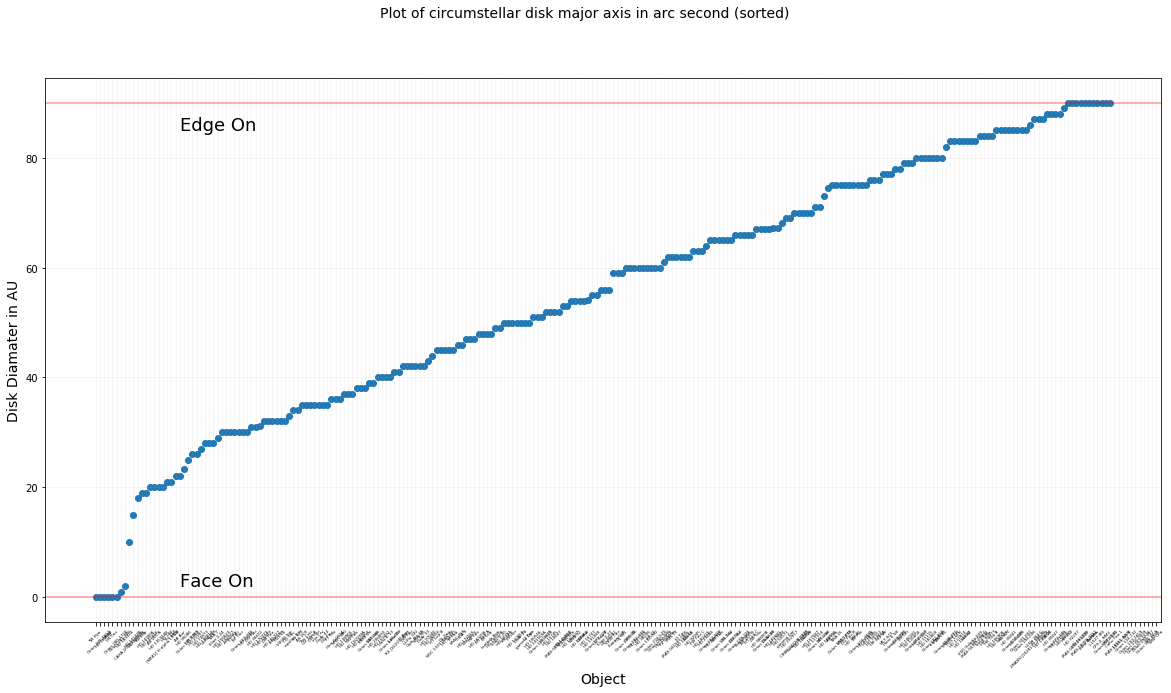

In [28]:
fig = plt.figure(figsize=(20,10))
plt.scatter(sorted_disks["Object"], sorted_disks['Inclination_degrees'])

fig.suptitle('Plot of circumstellar disk major axis in arc second (sorted)', fontsize=14)

plt.axhline(y=0, alpha= 0.4, color='r')
plt.axhline(y=90, alpha= 0.4, color='r')

plt.xlabel('Object', fontsize=14)
plt.ylabel('Disk Diamater in AU', fontsize=14)

plt.yticks(np.arange(0, 100, step=20))
plt.xticks(rotation=45, fontsize=4)

plt.text(20, 2, "Face On", color='black', fontsize = 18)
plt.text(20, 85, "Edge On", color='black', fontsize = 18)

plt.grid(alpha = 0.15)
#plt.savefig('Disk_major_axis_sorted.png')
plt.show()

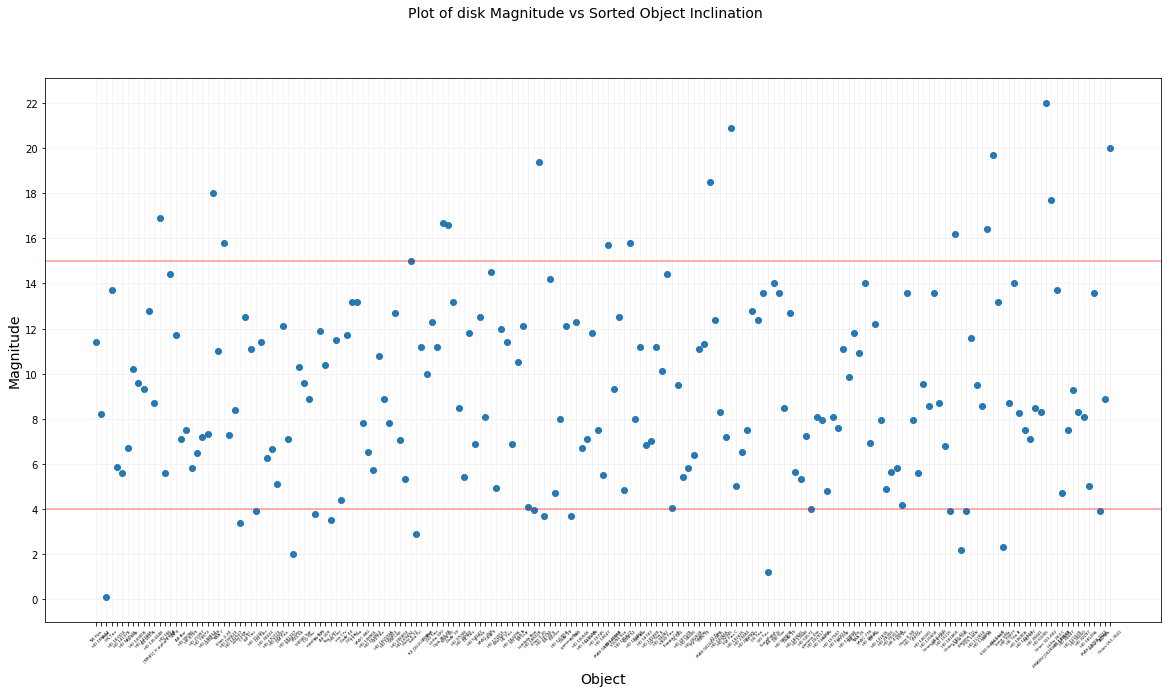

Length Array: 191


In [38]:
#magnitudes_sorted = sorted_objects.dropna()
fig = plt.figure(figsize=(20,10))
plt.scatter(Obj_magnitude_inc["Object"], Obj_magnitude_inc['R_band_mag'] )

fig.suptitle('Plot of disk Magnitude vs Sorted Object Inclination', fontsize=14)

#plt.axvline(x=252, alpha= 0.4, color='r')
#plt.axhline(y=15, alpha= 0.4, color='r')

#bracket
plt.axhline(y=4, alpha= 0.4, color='r')
plt.axhline(y=15, alpha= 0.4, color='r')

plt.xlabel('Object', fontsize=14)
plt.ylabel('Magnitude', fontsize=14)

plt.yticks(np.arange(0, 24, step=2))
plt.xticks(rotation=45, fontsize=4)

plt.grid(alpha = 0.15)
#plt.savefig("Magnitude_sorted_diameter_AU.png")

plt.show()

#print("Highest Magnitude: " + str( np.array( cat_magnitude_diameter["R_band_mag"])))
print("Length Array: " + str( len(np.array(  Obj_magnitude_inc['R_band_mag']))))

#print("Less negative correlation between magnitude and Disk Diameter in AU")

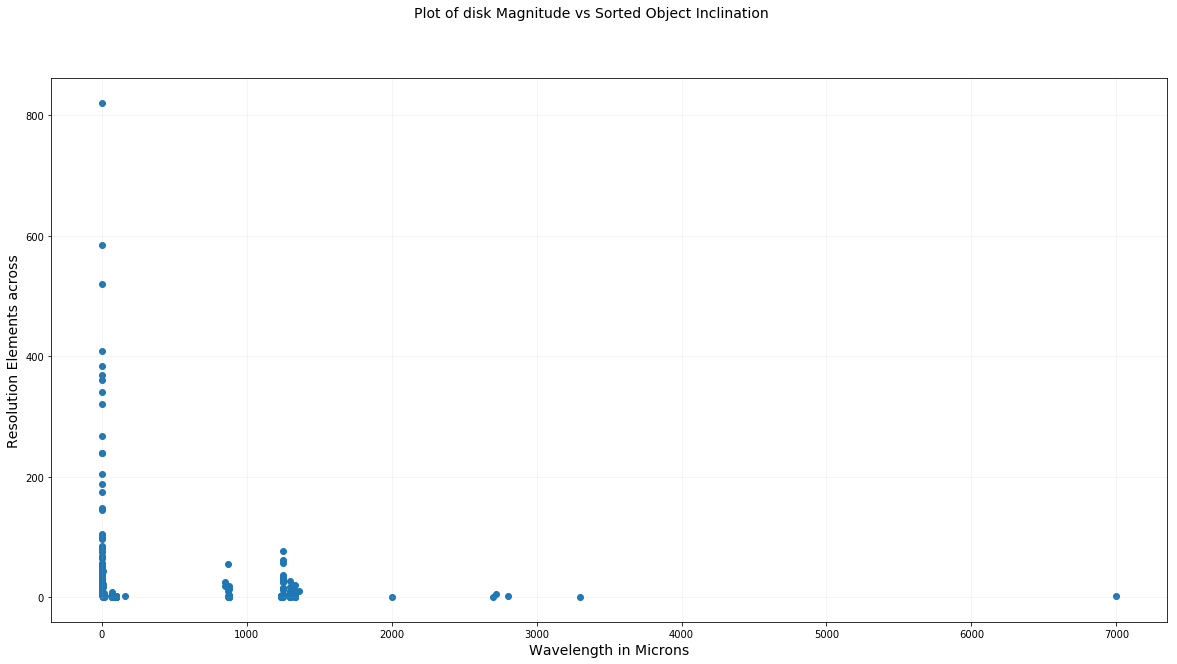

Length Array: 191


In [40]:
#lets plot resolution
fig = plt.figure(figsize=(20,10))
plt.scatter(data["At_ref.wavelength_microns"], data['Resolution_elements_across'] )

fig.suptitle('Plot of disk Magnitude vs Sorted Object Inclination', fontsize=14)

#plt.axvline(x=252, alpha= 0.4, color='r')
#plt.axhline(y=15, alpha= 0.4, color='r')

#bracket R-Band Magnitude
#plt.axhline(y=4, alpha= 0.4, color='r')
#plt.axhline(y=15, alpha= 0.4, color='r')

plt.xlabel('Wavelength in Microns', fontsize=14)
plt.ylabel('Resolution Elements across', fontsize=14)

#plt.yticks(np.arange(0, 24, step=2))
#plt.xticks(rotation=45, fontsize=4)

plt.grid(alpha = 0.15)
#plt.savefig("Magnitude_sorted_diameter_AU.png")

plt.show()

#print("Highest Magnitude: " + str( np.array( cat_magnitude_diameter["R_band_mag"])))
print("Length Array: " + str( len(np.array(  Obj_magnitude_inc['R_band_mag']))))

#print("Less negative correlation between magnitude and Disk Diameter in AU")